# Differentiability: the second order

## [Michel Bierlaire](https://people.epfl.ch/michel.bierlaire), EPFL.

Consider $f:\mathbb{R}^2 \to \mathbb{R}$ defined as \\[f(x)= \frac{1}{3} x_1^3 +x_2^3-x_1-x_2.\\]

It corresponds to the second function in Exercise 2.2 in the book.

Its gradient is \\[ \nabla f(x) = \left(\begin{array}{c}x_1^2-1 \\ 3 x_2^2-1 \end{array}\right).\\]

Its hessian is \\[ \nabla^2 f(x) = \left( \begin{array}{cc} 2 x_1 & 0 \\ 0 & 6 x_2\end{array}\right).\\]

In [1]:
import numpy as np
def ex(x):
    f = x[0]**3 / 3 + x[1]**3 - x[0] - x[1]
    g = np.array([ x[0] * x[0] - 1, 3 * x[1] * x[1] - 1])
    h = np.array([[2 * x[0], 0], [0, 6 * x[1]]])
    return f, g, h

Evaluate the function at \\[ x = \left(\begin{array}{c}9 \\ 1 \end{array}\right).\\]

In [2]:
x = np.array([9, 1])
f, g, h = ex(x)

In [3]:
print(f)

234.0


In [4]:
print(g)

[80  2]


In [5]:
print(h)

[[18  0]
 [ 0  6]]


To plot the function, we first import the libraries.

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

Then we write a wrapper that returns only the value of the function.

In [7]:
def fplot(x, y):
    npx = np.array([x, y])
    return ex(npx)[0]

Finally, we plot the function for a range of values of $x_1$ and $x_2$.

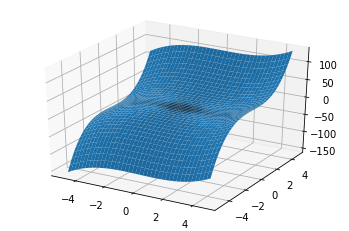

In [8]:
x1 = np.arange(-5, 5, 0.25)
x2 = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(x1, x2)
Z = np.array([[fplot(x, y) for x in x1] for y in x2])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

Consider the direction \\[ d = \left(\begin{array}{c} -1 \\ -1 \end{array} \right), \\]
and \\[ g(\alpha) = f(x+ \alpha d),\\] the one-dimensional function from $x$ along $d$.

In [9]:
d = np.array([-1, -1])
def onedimension(alpha):
    thex = x + alpha * d
    return ex(thex)[0]

Plot that function.

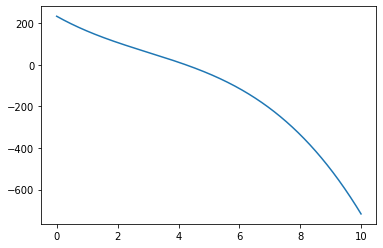

In [10]:
plotalpha = np.arange(0, 10, 0.01)
fx = np.array([onedimension(alpha) for alpha in plotalpha])
plt.plot(plotalpha, fx)

The directional derivative is $\nabla f(x)^T d$, where $x = \left(\begin{array}{c}9 \\ 1 \end{array}\right).$

In [11]:
print(np.inner(g, d))

-82


The curvature is \\[\frac{d^T H d}{d^T d},\\] where $x = \left(\begin{array}{c}9 \\ 1 \end{array}\right).$

In [12]:
def curvature(h, d):
    return np.inner(d, h @ d) / np.inner(d, d)

In [13]:
print(curvature(h, d))

12.0


Calculate the eigenvalues and eigenvectors.

In [14]:
from numpy import linalg as LA

In [15]:
eigenvalues, eigenvectors = LA.eig(h)

In [16]:
eigenvalues

array([18.,  6.])

In [17]:
eigenvectors

array([[1., 0.],
       [0., 1.]])

The curvature along the eigenvectors are the eigenvalues.

In [18]:
print(curvature(h, eigenvectors[0]))
print(curvature(h, eigenvectors[1]))

18.0
6.0
